# Visualising taxa abundance

In [1]:
setwd("/home/projects/14001280/PROJECTS/blood_microbiome/")
require(tidyverse)
require(ggplot2)
require(data.table)
require(ggsci)

Loading required package: tidyverse

Warning message:
“Your system is mis-configured: ‘/etc/localtime’ is not a symlink”
Warning message:
“It is strongly recommended to set envionment variable TZ to ‘Asia/Singapore’ (or equivalent)”
── Attaching packages ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.4     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: data.table


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘pack

In [2]:
meta <- fread("data/SG10K_Health_metadata.n10714.16March2021.parsed.csv")
head(meta)

npm_research_id,multiplex_pool_id,supplier_id,gis_internal_sample_id,site_supplying_sample,year_of_birth,supplied_gender,self_reported_ethnicity,extraction_kit,date_of_dna_extraction,⋯,supplied_and_computed_gender_match,sop_agreement_for_coverage__14/_28_for_15x/30x,sample_life_cycle,current,source_cohort,original_supplier_id,duplicate_info,duplicate,duplicate_pair,removal_requested_by_supplier
<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
WHB10000,MUX9693,00358,HELIOS_00358_1,HELIOS,1982,F,Chinese,abGENIX Whole Blood Genomic DNA Extraction Kit,6/6/2019,⋯,Y,Y,HELIOS VCF,Y,HELIOS,00358,Unknown,PASS,Unknown,Unknown
WHB10001,MUX9693,00359,HELIOS_00359_1,HELIOS,1979,F,Chinese,abGENIX Whole Blood Genomic DNA Extraction Kit,6/6/2019,⋯,Y,Y,HELIOS VCF,Y,HELIOS,00359,Unknown,PASS,Unknown,Unknown
WHB10002,MUX9695,00360,HELIOS_00360_1,HELIOS,1970,F,Chinese,abGENIX Whole Blood Genomic DNA Extraction Kit,6/6/2019,⋯,Y,N,HELIOS VCF,Y,HELIOS,00360,Unknown,PASS,Unknown,Unknown
WHB10003,MUX9694,00361,HELIOS_00361_1,HELIOS,1969,M,Chinese,abGENIX Whole Blood Genomic DNA Extraction Kit,6/6/2019,⋯,Y,Y,HELIOS VCF,Y,HELIOS,00361,Unknown,PASS,Unknown,Unknown
WHB10005,MUX9694,00363,HELIOS_00363_1,HELIOS,1959,F,Chinese,abGENIX Whole Blood Genomic DNA Extraction Kit,6/6/2019,⋯,Y,N,HELIOS VCF,Y,HELIOS,00363,Unknown,PASS,Unknown,Unknown
WHB10006,MUX9694,00364,HELIOS_00364_1,HELIOS,1955,F,Chinese,abGENIX Whole Blood Genomic DNA Extraction Kit,6/6/2019,⋯,Y,Y,HELIOS VCF,Y,HELIOS,00364,Unknown,PASS,Unknown,Unknown


## Pre-process data

In [3]:
rank <- "S"
n_subset <- 10

In [4]:
load_data <- function(file_path) {
    df <- fread(file_path) %>%
        column_to_rownames("sample")
    return(df)
}

rank <- "S"
n_subset <- 100

species_df <- load_data(str_glue("data/temp_files_{n_subset}/07_abundance_matrix/abundance_matrix.subset_{n_subset}.{rank}.tsv"))
head(species_df)

# species_df <- load_data('')

,unclassified,Homo sapiens,Bradyrhizobium sp. SK17,Bradyrhizobium lablabi,Bradyrhizobium ottawaense,Bradyrhizobium sp. ORS 3257,Bradyrhizobium oligotrophicum,Bradyrhizobium sp. ORS 285,Bradyrhizobium sp. BTAi1,Bradyrhizobium icense,⋯,Virgibacillus dokdonensis,Lactobacillus sp. wkB8,Candidatus Mikella endobia,Pseudoalteromonas espejiana,Candidatus Blochmannia floridanus,Pragia fontium,Vibrio nigripulchritudo,Propionibacterium virus ATCC29399BC,Mycobacterium virus Bane1,Gordonia phage Nyceirae
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MUX9276.WHB4733,37055,1038,263,2,2,2,2,1,1,1,⋯,0,0,0,0,0,0,0,0,0,0
SSMP_001_to_009.SSM009,347,11,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
MUX8330.WHB5084,15521,859,649,6,8,10,8,11,14,13,⋯,0,0,0,0,0,0,0,0,0,0
MUX5236.WHB840,4121,386,19,0,0,0,0,0,0,1,⋯,0,0,0,0,0,0,0,0,0,0
MUX5341.WHB979,9941,605,0,0,0,1,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
MUX4127.WHH1895,4751,746,0,0,0,1,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


### Count and remove samples with no classified reads
This may include samples that originally had no reads, and samples whose reads cannot be classified

In [5]:
count_zero_reads <- function(df) {
    df %>%
        rowwise() %>%
        mutate(total = sum(across(everything()))) %>%
        filter(total == 0) %>%
        nrow()
    }

count_zero_reads(species_df)

[1] 0

### Normalise to relative abundance

In [6]:
normalise <- function(df) {
    RA_df <- t(apply(df, 1, function(x) {x / sum(x) * 100}))
    return(RA_df)
}

species_RA <- normalise(species_df)
species_RA

,unclassified,Homo sapiens,Bradyrhizobium sp. SK17,Bradyrhizobium lablabi,Bradyrhizobium ottawaense,Bradyrhizobium sp. ORS 3257,Bradyrhizobium oligotrophicum,Bradyrhizobium sp. ORS 285,Bradyrhizobium sp. BTAi1,Bradyrhizobium icense,⋯,Virgibacillus dokdonensis,Lactobacillus sp. wkB8,Candidatus Mikella endobia,Pseudoalteromonas espejiana,Candidatus Blochmannia floridanus,Pragia fontium,Vibrio nigripulchritudo,Propionibacterium virus ATCC29399BC,Mycobacterium virus Bane1,Gordonia phage Nyceirae
MUX9276.WHB4733,95.95763,2.6880050,0.681064844,0.0051792003,0.005179200,0.005179200,0.005179200,0.002589600,0.00258960,0.002589600,⋯,0,0,0,0,0,0,0,0,0,0
SSMP_001_to_009.SSM009,96.65738,3.0640669,0.000000000,0.0000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.00000000,0.000000000,⋯,0,0,0,0,0,0,0,0,0,0
MUX8330.WHB5084,23.05727,1.2760900,0.964123895,0.0089133180,0.011884424,0.014855530,0.011884424,0.016341083,0.02079774,0.019312189,⋯,0,0,0,0,0,0,0,0,0,0
MUX5236.WHB840,90.05682,8.4353147,0.415209790,0.0000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.00000000,0.021853147,⋯,0,0,0,0,0,0,0,0,0,0
MUX5341.WHB979,86.64691,5.2732502,0.000000000,0.0000000000,0.000000000,0.008716116,0.000000000,0.000000000,0.00000000,0.000000000,⋯,0,0,0,0,0,0,0,0,0,0
MUX4127.WHH1895,85.94428,13.4949349,0.000000000,0.0000000000,0.000000000,0.018089725,0.000000000,0.000000000,0.00000000,0.000000000,⋯,0,0,0,0,0,0,0,0,0,0
MUX5185.WHB711,89.75365,9.7013298,0.000000000,0.0000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.00000000,0.000000000,⋯,0,0,0,0,0,0,0,0,0,0
MUX9967.WHB7729,92.06035,2.2924451,0.003166361,0.0000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.00158318,0.000000000,⋯,0,0,0,0,0,0,0,0,0,0
MUX9038.WHB4012,89.31582,3.7331513,0.027299096,0.0034123870,0.000000000,0.000000000,0.006824774,0.003412387,0.01706193,0.013649548,⋯,0,0,0,0,0,0,0,0,0,0
MUX10691.WHB11068,52.49687,1.3024684,0.298600842,0.2075986805,0.076783074,0.082470709,0.082470709,0.127971789,0.36116483,0.190535775,⋯,0,0,0,0,0,0,0,0,0,0


## Relative abundance for all samples

### Matrix --> long format

In [7]:
to_long_format <- function(RA_df) {
    plot_df <- as_tibble(RA_df, rownames = "sample") %>%
        pivot_longer(!sample, names_to = "rank", values_to = "abundance")
    return(plot_df)
    }

plot_species_RA <- to_long_format(species_RA)

### Keep only top N ranks
ranked by median relative abundance

In [8]:
get_top_N_ranks <- function(plot_df, n_keep) {
    ranks_to_keep <- plot_df %>% 
        group_by(rank) %>%
        summarise(median = median(abundance)) %>%
        arrange(desc(median))
      ranks_to_keep <- ranks_to_keep$rank[1:n_keep]
    return(ranks_to_keep)
}

n_keep <- 8
species_to_keep <- get_top_N_ranks(plot_species_RA, n_keep)

### Visualise relative abundances

Define palette

In [9]:
pal <- c("#d1495b", "#00798c", "#edae49", 
         "#66a182", "#2e4057", "#8d96a3",
         "#8E44AD", "#2980b9")

Order by total percentage of top taxa

In [27]:
get_sample_order <- function(plot_df, species_to_keep) {
    ordered_df <- plot_df %>%
        filter(rank %in% species_to_keep) %>%
        group_by(sample) %>%
        summarise(total = sum(abundance)) %>% 
        arrange(desc(total))

    taxa_order <- ordered_df$sample
    return(taxa_order)
}

sample_order <- get_sample_order(plot_species_RA, species_to_keep)

Plot

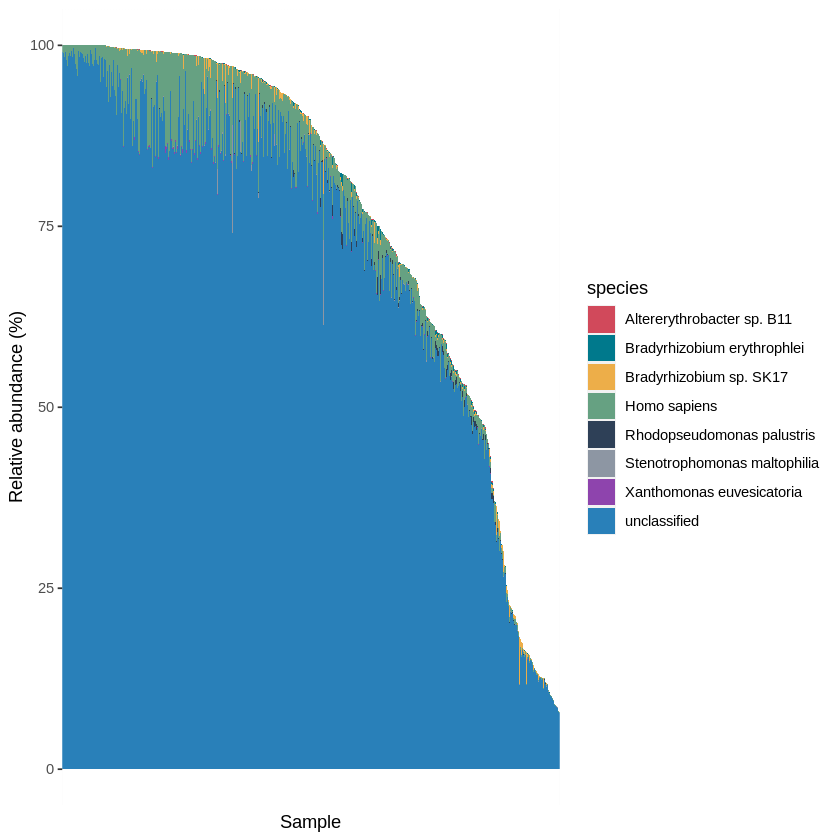

In [29]:
get_plot <- function(plot_df, ranks_to_keep, rank_name, sample_order) {
    plt <- plot_df %>%
        filter(rank %in% ranks_to_keep) %>%
        mutate(sample = factor(sample, levels = sample_order)) %>%
        ggplot(aes(x = sample, y = abundance, fill = rank)) +
            geom_bar(stat = "identity", position = "stack") +
            labs(x = "Sample", y = "Relative abundance (%)", fill = rank_name) +
            theme(axis.text.x = element_blank(),
                  axis.ticks.x = element_blank()) +
            scale_fill_manual(values = pal[1:n_keep])
    return(plt)
}

# get_plot(plot_family_RA, family_to_keep, "family")
# get_plot(plot_genus_RA, genus_to_keep, "genus")
get_plot(plot_species_RA, species_to_keep, "species", sample_order)

Rather heterogenous

## Relative abundance by cohort

### Add metadata, groupby cohort and --> long format

In [36]:
parse_cohort_data <- function(RA_df) {
    plot2_df <- as_tibble(RA_df, rownames = "sample") %>%
        separate(sample, into = c(NA, "npm_research_id"), sep = "\\.") %>%
        left_join(meta, by = "npm_research_id")
    
    plot2_df <- plot2_df %>%
    group_by(source_cohort) %>%
    summarise(across(where(is.numeric), ~ mean(.x, na.rm = T))) %>%
    pivot_longer(!source_cohort, names_to = "rank", values_to = "abundance")
}

# cohort_family_RA <- parse_cohort_data(family_RA)
# cohort_genus_RA <- parse_cohort_data(genus_RA)
cohort_species_RA <- parse_cohort_data(species_RA)

### Visualise

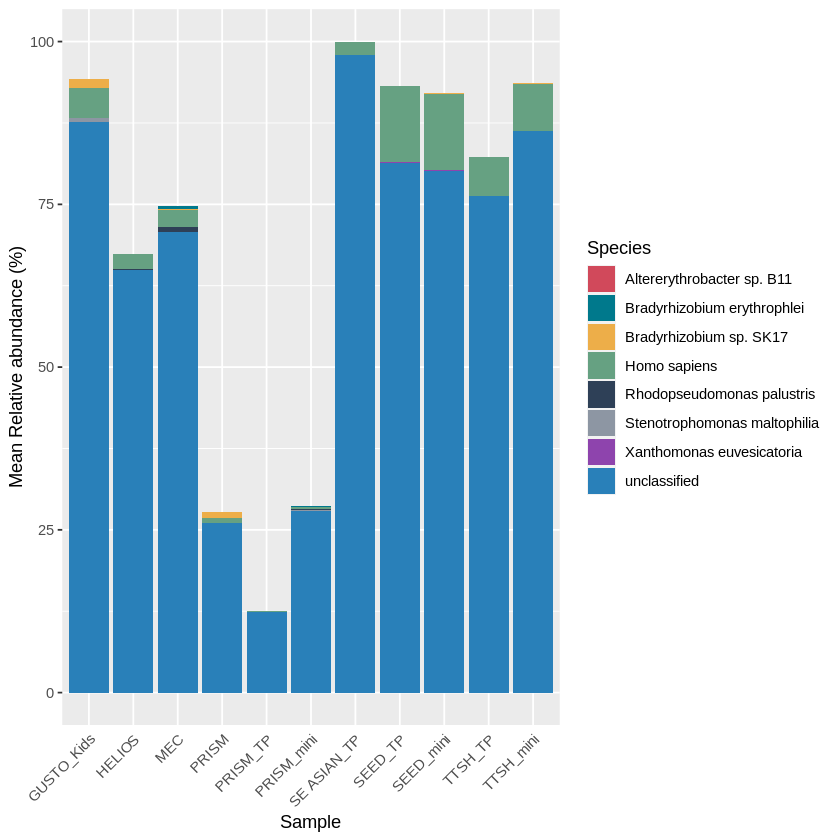

In [38]:
get_cohort_plt <- function(plot2_df, ranks_to_keep, rank_name) {
    plt <- plot2_df %>%
        filter(rank %in% ranks_to_keep) %>%
    #     mutate(sample = factor(sample, levels = unique(sample)[order(sample)])) %>%
        ggplot(aes(x = source_cohort, y = abundance, fill = rank)) +
            geom_bar(stat = "identity", position = "stack") +
            labs(x = "Sample", y = "Mean Relative abundance (%)", fill = rank_name) +
            theme(axis.text.x = element_text(angle = 45, hjust = 1),
                  axis.ticks.x = element_blank()) +
            scale_fill_manual(values = pal[1:n_keep])
    return(plt)
}

# get_cohort_plt(cohort_family_RA, family_to_keep, "Family")
# get_cohort_plt(cohort_genus_RA, genus_to_keep, "Genus")
get_cohort_plt(cohort_species_RA, species_to_keep, "Species")